In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functools import reduce
import seaborn as sns
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor

In [36]:
df1=pd.read_csv('blane_before_hpgr.csv')

In [37]:
df1.insert(loc=0, column='new_date', value=df1['Date']+' '+df1['Time'])

In [38]:
df1['new_date']=pd.to_datetime(df1['new_date'])
df1['new_date']=df1['new_date']-timedelta( minutes=0, hours=7)
df1['new_date']=df1['new_date'].dt.date
df1.drop(['Date','Time'],axis=1,inplace=True)
df1=df1.groupby(['new_date']).mean()


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Blane_before_hpgr  974 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [40]:
df2=pd.read_csv('blane_after_hpgr.csv')

In [41]:
df2.insert(loc=0, column='new_date', value=df2['Date']+' '+df2['Time'])

In [42]:
df2['new_date']=pd.to_datetime(df2['new_date'])
df2['new_date']=df2['new_date']-timedelta( minutes=0, hours=7)
df2['new_date']=df2['new_date'].dt.date
df2.drop(['Date','Time'],axis=1,inplace=True)
df2=df2.groupby(['new_date']).mean()


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Blane_after_hpgr  976 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [44]:
df3=pd.read_csv('area600.csv')

In [45]:
df3.insert(loc=0, column='new_date', value=df3['Date']+' '+df3['Time'])

In [46]:
df3['new_date']=pd.to_datetime(df3['new_date'])
df3['new_date']=df3['new_date']-timedelta( minutes=0, hours=7)
df3['new_date']=df3['new_date'].dt.date
df3.drop(['Date','Time'],axis=1,inplace=True)
df3=df3.groupby(['new_date']).mean()

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 2019-03-20 to 2022-02-22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MC%         979 non-null    float64
 1   Drop        979 non-null    float64
 2   Co_9-16_mm  890 non-null    float64
dtypes: float64(3)
memory usage: 30.6+ KB


In [48]:
df4=pd.read_csv('row-data.csv')

In [49]:
df4['Date']=pd.to_datetime(df4['Date'])
df4['Date']=df4['Date'].dt.date
df4.rename(columns={'Date' : 'new_date'}, inplace=True)
df4=df4.groupby(['new_date']).mean()

In [50]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 2019-01-04 to 2022-12-02
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   710FN3_Damper(%)  1067 non-null   float64
 1   Water_Mix1(m3/h)  1067 non-null   float64
 2   Water_Mix2(m3/h)  1067 non-null   float64
 3   Kiln_Speed(rpm)   1067 non-null   float64
 4   710FN1_Damper(%)  1067 non-null   float64
 5   730FN1_Damper(%)  1067 non-null   float64
 6   Grate_Feed(ton)   1067 non-null   float64
 7   OffGas(deg)       1043 non-null   float64
 8   WF5(t/h)          1067 non-null   float64
 9   WF6(t/h)          1067 non-null   float64
 10  Grate_Speed(rpm)  1067 non-null   float64
dtypes: float64(11)
memory usage: 100.0+ KB


In [51]:
df5=pd.read_csv('area700.csv')

In [52]:
df5.insert(loc=0, column='new_date', value=df5['Date']+' '+df5['Time'])

In [53]:
df5['new_date']=pd.to_datetime(df5['new_date'])
df5['new_date']=df5['new_date']-timedelta( minutes=0, hours=7)
df5['new_date']=df5['new_date'].dt.date
df5.drop(['Date','Time'],axis=1,inplace=True)
df5=df5.groupby(['new_date']).mean()

In [54]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FeO        974 non-null    float64
 1   P_9-16_mm  961 non-null    float64
dtypes: float64(2)
memory usage: 22.9+ KB


In [55]:
data_frames = [df1, df2, df3,df4,df5]
df = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],how='outer'), data_frames)

In [56]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,Co_9-16_mm,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
count,974.000000,976.000000,979.000000,979.000000,890.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1043.000000,1067.000000,1067.000000,1067.000000,974.000000,961.000000
mean,1625.523707,1922.526979,9.043888,4.317780,39.728198,38.078660,3.004208,3.278772,1.473458,46.996345,36.095201,10897.653121,850.376855,13.398360,13.554733,5.127470,0.880922,87.438809
std,135.152757,136.915710,0.190926,0.608726,5.516029,14.269039,1.553201,2.609452,0.431257,17.792247,14.935324,4141.839753,688.691612,7.488141,7.475316,1.959544,0.326644,2.428837
min,1278.400000,1547.444444,7.966667,1.720000,17.370167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.700000,24.780000,0.000000,0.000000,-0.020000,0.255000,78.435000
25%,1521.877778,1825.840909,8.915192,3.895020,36.044569,35.510000,2.020000,2.095000,1.530000,46.990000,33.215000,11410.865000,816.760000,8.070000,8.580000,5.300000,0.670000,85.970000
50%,1636.289773,1910.650000,9.041667,4.297639,40.052515,42.930000,3.150000,3.150000,1.630000,52.630000,36.310000,12673.010000,855.050000,15.140000,15.330000,5.830000,0.812262,87.490000
75%,1733.443182,2011.533333,9.174621,4.664722,43.644855,46.445000,4.090000,4.175000,1.680000,57.660000,37.880000,13080.730000,890.980000,19.095000,19.275000,6.230000,1.010250,88.870000
max,1970.000000,2370.000000,9.681429,7.526667,57.206333,100.000000,7.330000,30.000000,1.780000,74.720000,100.000000,18548.260000,22541.810000,30.220000,29.940000,6.930000,3.570000,95.860000


In [57]:
df = df.ffill()

In [58]:
df.dropna(how='any',axis=0,inplace=True)

In [59]:
df=df[(df['Grate_Feed(ton)'] >9500) & (df['Grate_Feed(ton)'] <14000) ]

In [60]:
df

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,Co_9-16_mm,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
new_date,,,,,,,,,,,,,,,,,,
2019-06-01,1851.500000,2204.100000,8.802778,4.976389,33.115833,37.30,0.83,0.45,1.70,48.25,34.80,12977.57,842.32,13.54,13.78,5.76,1.025000,87.473333
2019-06-02,1838.083333,2197.416667,8.825000,4.508056,38.297083,37.30,0.83,0.45,1.70,48.25,34.80,12977.57,842.32,13.54,13.78,5.76,0.744286,86.810000
2019-06-03,1814.900000,2205.700000,8.623611,4.351667,46.954056,37.30,0.83,0.45,1.70,48.25,34.80,12977.57,842.32,13.54,13.78,5.76,0.613333,87.706667
2019-06-04,1811.454545,2172.909091,8.729167,4.569583,45.105000,31.35,1.92,2.12,1.72,48.00,32.75,13149.89,791.81,18.31,19.59,5.96,0.610000,86.293333
2019-06-05,1845.100000,2250.200000,8.620833,4.302778,45.289167,30.24,1.88,1.65,1.70,52.08,32.60,12114.67,869.37,17.99,15.58,5.49,0.483333,87.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,1534.400000,1930.000000,9.166667,4.416667,35.887667,46.71,1.70,1.71,1.60,58.90,47.73,13917.40,898.75,16.55,16.64,6.82,0.700000,87.710000
2022-11-02,1534.400000,1930.000000,9.166667,4.416667,35.887667,47.37,2.58,2.56,1.55,63.04,48.76,13838.00,894.06,20.88,20.90,6.86,0.700000,87.710000
2022-12-01,1534.400000,1930.000000,9.166667,4.416667,35.887667,46.40,1.99,1.99,1.60,60.55,47.83,13877.86,894.48,15.87,15.93,6.80,0.700000,87.710000


<AxesSubplot:title={'center':'Grate Feed (ton)'}, xlabel='new_date', ylabel='Grate_Feed(ton)'>

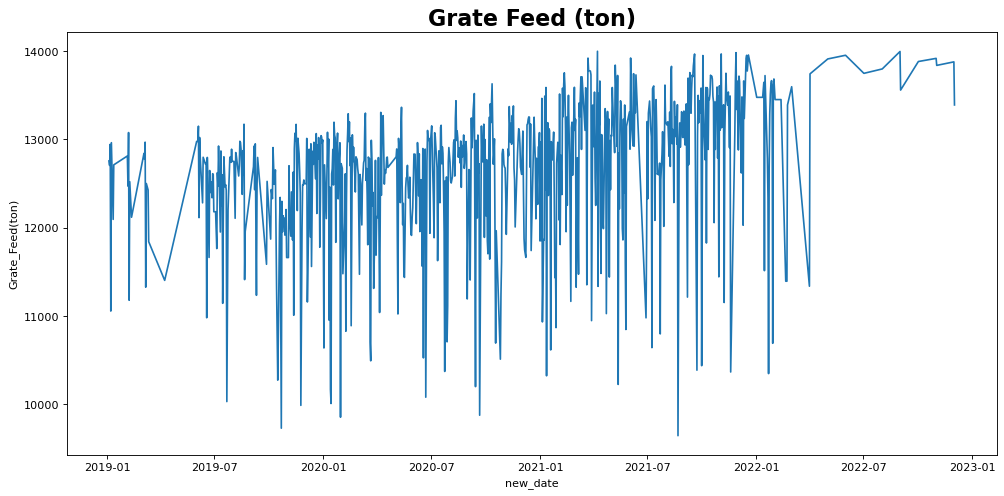

In [61]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Feed(ton)'], data=df )

In [62]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,Co_9-16_mm,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1612.150448,1907.502125,9.063089,4.245522,39.551487,43.468911,3.455471,3.516377,1.621248,54.650012,38.256891,12672.237173,860.644590,15.553770,15.775251,5.978715,0.867557,87.377800
std,126.801285,118.582222,0.180326,0.513773,5.339923,4.623789,1.241222,1.320031,0.087696,5.829370,4.940105,788.313479,51.365975,5.899996,5.810061,0.497904,0.311918,2.282764
min,1278.400000,1547.444444,8.518056,2.798194,17.370167,27.760000,0.540000,0.400000,1.110000,23.950000,28.090000,9646.270000,625.750000,0.000000,0.000000,4.260000,0.286667,78.435000
25%,1523.083333,1828.600000,8.941538,3.884038,35.887667,40.440000,2.640000,2.610000,1.550000,50.760000,35.460000,12339.250000,822.760000,12.250000,12.480000,5.670000,0.663333,86.040000
50%,1606.000000,1908.777778,9.068056,4.276806,39.594105,44.640000,3.460000,3.470000,1.640000,54.690000,36.700000,12831.070000,861.460000,16.290000,16.560000,6.000000,0.806000,87.656667
75%,1719.500000,1981.181818,9.168750,4.520000,43.466231,46.950000,4.230000,4.300000,1.680000,58.890000,38.160000,13177.100000,898.040000,19.860000,19.940000,6.350000,1.006364,88.690000
max,1970.000000,2370.000000,9.681429,6.339242,57.206333,53.210000,7.330000,7.460000,1.780000,74.720000,50.480000,13997.600000,983.240000,30.220000,29.940000,6.930000,2.595714,95.310000


In [63]:
col=df.columns
data=df.values
idx=df.index.values

In [64]:
iso = IsolationForest()
yhat = iso.fit_predict(data)
yhat.shape

(817,)

In [65]:
# select all rows that are not outliers
mask = yhat != -1
mask.shape

(817,)

In [66]:
data = data[mask, :]
idx = idx[mask]

In [67]:
df=pd.DataFrame(data,columns=col,index=idx)
df

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,Co_9-16_mm,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
2019-06-02,1838.083333,2197.416667,8.825000,4.508056,38.297083,37.30,0.83,0.45,1.70,48.25,34.80,12977.57,842.32,13.54,13.78,5.76,0.744286,86.810000
2019-06-03,1814.900000,2205.700000,8.623611,4.351667,46.954056,37.30,0.83,0.45,1.70,48.25,34.80,12977.57,842.32,13.54,13.78,5.76,0.613333,87.706667
2019-06-04,1811.454545,2172.909091,8.729167,4.569583,45.105000,31.35,1.92,2.12,1.72,48.00,32.75,13149.89,791.81,18.31,19.59,5.96,0.610000,86.293333
2019-06-06,1848.000000,2221.833333,8.755556,4.592361,35.760667,36.10,2.67,2.60,1.70,50.00,37.31,13021.20,866.86,19.85,19.39,5.82,0.476667,86.500000
2019-06-07,1834.777778,2210.444444,8.601389,4.147222,33.692083,37.14,5.31,5.31,1.70,53.81,37.56,12803.71,887.64,10.87,12.87,5.79,0.573333,88.646667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,1534.400000,1930.000000,9.166667,4.416667,35.887667,46.71,1.70,1.71,1.60,58.90,47.73,13917.40,898.75,16.55,16.64,6.82,0.700000,87.710000
2022-11-02,1534.400000,1930.000000,9.166667,4.416667,35.887667,47.37,2.58,2.56,1.55,63.04,48.76,13838.00,894.06,20.88,20.90,6.86,0.700000,87.710000
2022-12-01,1534.400000,1930.000000,9.166667,4.416667,35.887667,46.40,1.99,1.99,1.60,60.55,47.83,13877.86,894.48,15.87,15.93,6.80,0.700000,87.710000
2022-12-02,1534.400000,1930.000000,9.166667,4.416667,35.887667,44.69,2.28,2.27,1.54,59.68,47.78,13390.01,864.99,25.82,25.78,6.54,0.700000,87.710000


<AxesSubplot:title={'center':'Grate Feed (ton)'}, ylabel='Grate_Feed(ton)'>

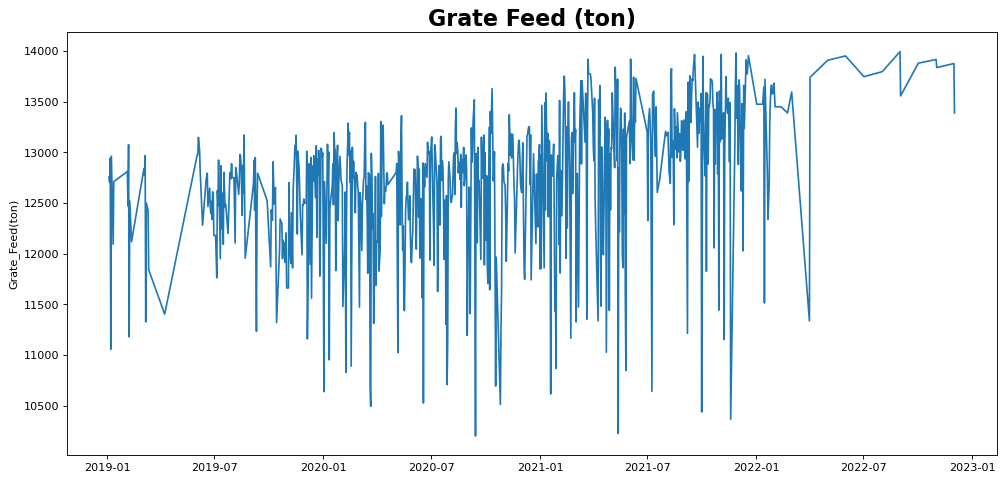

In [68]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Feed(ton)'], data=df )

In [69]:
df.describe()

,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,Co_9-16_mm,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,1613.865330,1909.744346,9.067727,4.255027,39.425689,43.668679,3.409445,3.464941,1.627107,54.817926,38.382193,12745.403184,858.343699,15.782616,15.986697,6.020092,0.870761,87.402090
std,122.416436,109.473006,0.174551,0.494093,5.271865,4.321082,1.142208,1.228686,0.077720,5.489786,4.842978,687.674101,47.886763,5.763304,5.660931,0.449231,0.314189,2.175195
min,1278.400000,1584.900000,8.518056,2.936111,17.370167,31.350000,0.540000,0.400000,1.350000,23.950000,30.050000,10201.320000,640.790000,0.000000,0.000000,4.740000,0.286667,79.795000
25%,1529.166667,1832.000000,8.952778,3.894306,35.887667,41.070000,2.660000,2.650000,1.550000,51.090000,35.670000,12417.500000,822.060000,12.760000,12.790000,5.700000,0.675000,86.093333
50%,1607.583333,1913.000000,9.072464,4.285833,39.486462,44.690000,3.460000,3.470000,1.640000,54.800000,36.750000,12850.200000,859.670000,16.700000,16.790000,6.010000,0.808571,87.656667
75%,1719.500000,1981.000000,9.168750,4.517761,43.257368,46.930000,4.180000,4.260000,1.680000,58.890000,38.070000,13189.750000,894.720000,20.060000,20.000000,6.370000,1.011000,88.713333
max,1918.300000,2274.800000,9.681429,6.339242,57.206333,53.210000,7.140000,7.390000,1.780000,69.780000,50.480000,13995.260000,973.740000,28.200000,27.980000,6.930000,2.595714,94.700000
